# Trabajo Práctico Datos (75.06) - Análisis exploratorio de datos


El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

- El análisis debe estar hecho en R o Python Pandas.
- El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
- Agregar en Kaggle un kernel con el análisis exploratorio realizado.

La evaluación del TP se realizará en base al siguiente criterio:

- Originalidad del análisis exploratorio. 
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
- Calidad de las visualizaciones presentadas.
- ¿Tienen todos los ejes su rótulo?
- ¿Tiene cada visualización un título?
- ¿Es entendible la visualización sin tener que leer la explicación?
- ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
- ¿Es una visualización interesante?
- ¿El uso del color es adecuado?
- ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
- ¿La visualización es consistente con los datos?
- Conclusiones presentadas.
- ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? ¿Descubrieron cosas que pueden ser de interés las personas que estén pensando en realizar alguna operación inmobiliaria, o a empresa Properati?


In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#probando
#pev1 es el dataset con el que vamos a probar en la parte de ML
#pev1: desde 01/02/2017 - 01/08/2017
#pev1 = pd.read_csv('properties/properati-AR-2017-08-01-properties-sell-six_months.csv')
#pev1.head(10)
#121 mil observaciones
#pev1.info()

In [3]:
# Convertiremos la fecha de publicación
# Agregamos las series año y mes como columnas
#import calendar
#pev['Date'] = pd.to_datetime(pev['created_on'])
#pev['Año'] = pev['Date'].map(lambda x:x.year)
#pev['Mes'] = pev['Date'].map(lambda x:x.month)
#pev.describe()

## Cleaning Dataset

Cargamos todos los archivos, los unimos y les damos cierto formato

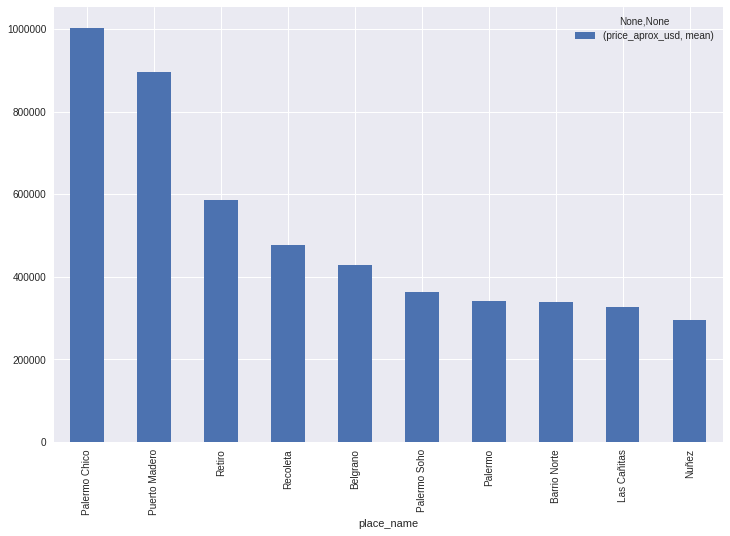

In [28]:
#pev2 desde 01/07/2016 hasta 30/01/2017
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev2.drop(['id', 'title', 'description', 'image_thumbnail'], axis=1, inplace = True)
#barrio con precio de propiedad promedio mas cara en dolares
capital = pev2.loc[pev2.state_name.str.contains('Capital Federal') & (pev2.place_name.str.contains('Capital Federal') == False) \
                   ,['place_name', 'price_aprox_usd']].groupby('place_name').agg([np.mean,np.size])
capital = capital.loc[capital[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(10)
capital.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
capital.plot(kind='bar',rot=90,figsize=(12,8))

In [29]:
#59 mil observaciones
pev2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 23 columns):
created_on                    59806 non-null object
operation                     59806 non-null object
property_type                 59806 non-null object
place_name                    59798 non-null object
place_with_parent_names       59806 non-null object
country_name                  59806 non-null object
state_name                    59806 non-null object
geonames_id                   50233 non-null float64
lat-lon                       49687 non-null object
lat                           49687 non-null float64
lon                           49687 non-null float64
price                         52882 non-null float64
currency                      50814 non-null object
price_aprox_local_currency    52882 non-null float64
price_aprox_usd               52882 non-null float64
surface_total_in_m2           42901 non-null float64
surface_covered_in_m2         49479 non-null float64

In [30]:
# desde 01-01-2016 - 29/07/2016
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev3.head(20)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,1a2880321720989ff0b9f194552af6dca4a0a460,2016-01-01,sell,apartment,Villa Pueyrredón,|Argentina|Capital Federal|Villa Pueyrredón|,Argentina,Capital Federal,3429703.0,"-34.615974,-58.438168",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/vxtm_venta_departa...,CODIGO: ubicado en: Carlos A Lopez 2247 - Pu...,Carlos A Lopez 2247. V. Pueyrredon. Entrega J...,https://thumbs4.properati.com/2/YndYwcS7Q6DQlT...
1,bd5da0292b7da1159ffd57bc1fddaf2a42723a59,2016-01-01,sell,apartment,Villa Crespo,|Argentina|Capital Federal|Villa Crespo|,Argentina,Capital Federal,3427458.0,"-34.6021709,-58.4576624",...,24.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/vxtn_venta_departa...,CODIGO: ubicado en: Paysandú 1970 - Publicad...,Ideal Inversión. Ultimas Unidades!! Dptos Amob...,https://thumbs4.properati.com/1/ROc8PYetbSqJ9Y...
2,71570f8f8d3e7631de6d7ac4dd555264fa41391a,2016-01-02,sell,apartment,Villa Gesell,|Argentina|Buenos Aires Costa Atlántica|Villa ...,Argentina,Buenos Aires Costa Atlántica,3427431.0,"-37.2762146,-56.9815025",...,46.0,NaN,1521.739130,NaN,NaN,280.0,http://www.properati.com.ar/vxzc_venta_departa...,CODIGO: 1780-B.I 0111 ubicado en: Avenida 1 - ...,"Departamento en Venta en Villa Gesell, Villa G...",https://thumbs4.properati.com/1/4FA3JvVH4nd_Aq...
3,24f1edc4cc08f56effcb246b333b135374cee348,2016-01-02,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.895552,-60.695",...,NaN,NaN,NaN,NaN,4.0,NaN,http://www.properati.com.ar/vxzh_venta_casa_sa...,Corredor Responsable: Rosana Gerosa - CI Mat. ...,Importante Esquina - Nuevo desarrollo - Canje m2,https://thumbs4.properati.com/0/TlbZSrf_-ILtxa...
4,e93e0c2c253036c21d85674d298332ebcc1f46f7,2016-01-02,sell,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,NaN,...,NaN,2363.636364,NaN,NaN,2.0,NaN,http://www.properati.com.ar/vy26_venta_departa...,Dos ambientes con dependencia de servicio a la...,Venta Departamento 2 Ambientes con dep. de ser...,https://thumbs4.properati.com/3/CS7rz03_ad50s2...
5,3f560762c2dd98cadadf7a976d13d5264eba1960,2016-01-02,sell,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9895449,-57.5686661",...,NaN,NaN,NaN,NaN,5.0,NaN,http://www.properati.com.ar/vy39_venta_casa_ma...,DOS VIVIENDAS SOBRE LOTE 8.66X43.30 CASA PRINC...,DOS VIVIENDAS SOBRE LOTE 8.66X43.30 DON BOSCO,https://thumbs4.properati.com/7/chQhBoEwifyRNP...
6,921146bd82ebfec118823a7832abc22760760ecb,2016-01-02,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.002008,-57.548953",...,48.0,2604.166667,2604.166667,NaN,2.0,NaN,http://www.properati.com.ar/vy3j_venta_departa...,Departamento de 2 ambientes al contrafrente co...,Córdoba y Moreno,https://thumbs4.properati.com/8/ZVuMNWcVLH5wGI...
7,7a3d39bb445a7ed2b5bcdf1227f43fad99eeef1e,2016-01-02,sell,house,Ricardone,|Argentina|Santa Fe|Ricardone|,Argentina,Santa Fe,3839061.0,"-32.7466134,-60.7415929",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/vy3s_venta_casa_ri...,Casa de 2 dormitorios en RicardoneSobre terren...,Belgrano 1300,https://thumbs4.properati.com/2/X5qAv6lvCwESq5...
8,50bf37281fea533248b8d69e902a78062e070234,2016-01-02,sell,house,Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|,Argentina,Bs.As. G.B.A. Zona Norte,3434130.0,"-34.4036891829,-58.756190946",...,180.0,773.913043,988.888889,NaN,7.0,NaN,http://www.properati.com.ar/vy3t_venta_casa_es...,"EXCELENTE PROPIEDAD UBICADA EN LOS NARANJOS, E...",Casa en Ingeniero Maschwitz,https://thumbs4.properati.com/0/vQbzFdkWrvWkKZ...
9,502d306245ad75c98bd272c2c1dd24d6371e45bb,2016-01-02,sell,apartment,C

In [31]:
#44mil observaciones
pev3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44332 entries, 0 to 44331
Data columns (total 27 columns):
id                            44332 non-null object
created_on                    44332 non-null object
operation                     44332 non-null object
property_type                 44332 non-null object
place_name                    44323 non-null object
place_with_parent_names       44332 non-null object
country_name                  44332 non-null object
state_name                    44332 non-null object
geonames_id                   37333 non-null float64
lat-lon                       34944 non-null object
lat                           34944 non-null float64
lon                           34944 non-null float64
price                         40202 non-null float64
currency                      37150 non-null object
price_aprox_local_currency    40202 non-null float64
price_aprox_usd               40202 non-null float64
surface_total_in_m2           28035 non-null float64


In [32]:
# desde 01/09/2015- 21/03/2016
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev4.head(10)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,44ea5bafa3b885e5258e43007df2585779e5104f,2015-09-01,sell,house,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,Bs.As. G.B.A. Zona Oeste,3435607.0,"-34.6437012,-58.6515478",...,500.0,1400.000000,1400.000000,NaN,6.0,NaN,http://www.properati.com.ar/sw8m_venta_casa_ca...,"Venta - Chalet - LOTE 730 M2 - 17,32x43,30mts....",CASA EN VENTA,https://thumbs4.properati.com/1/Xu5ZT3SuzUdM8Y...
1,5a098d1d52954434cb083a3b4bdd68a794f01576,2015-09-01,sell,house,Castelar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,Argentina,Bs.As. G.B.A. Zona Oeste,3435607.0,NaN,...,170.0,1058.823529,1058.823529,NaN,NaN,NaN,http://www.properati.com.ar/sw94_venta_casa_ca...,VENTA DE CASA 4 AMB - CASTELAR 170 m2 cub / 3...,CASA EN VENTA,https://thumbs4.properati.com/4/SMAEXX7hxbdJjt...
2,87396f4e1bb28607e2f62750bd49fb058bf0d82a,2015-09-01,sell,house,Victoria,|Argentina|Entre Ríos|Victoria|,Argentina,Entre Ríos,3832932.0,"-32.6217359754,-60.1509301683",...,110.0,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/sw9k_venta_casa_vi...,CODIGO: 2244-233 ubicado en: Piaggio - Public...,"CASA PIAGGIO al 600 . CENTRO, 470m2 terreno, t...",https://thumbs4.properati.com/5/vlD3CtzT4NhH3j...
3,f82a034e2adfc7d63c8846983931073a18212583,2015-09-01,sell,store,Tres de Febrero,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,Bs.As. G.B.A. Zona Oeste,3427655.0,"-34.5749414,-58.505417",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/sw9y_venta_local_s...,CODIGO: 1092-CAR7700 ubicado en: ARTIGAS 7200 ...,LOCAL DE 4X15 MTS SOBRE ARTIGAS,https://thumbs4.properati.com/7/Heh8OiQor2JoGF...
4,13d5a92b955b78d61bbe557fc2480e2c12c49d52,2015-09-01,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9509658,-60.676583",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/swa2_venta_departa...,CODIGO: 2366-155 ubicado en: Av. Pellegrini 37...,Vendo departamentos FUNDAR TORRE ALMA Av. Pell...,https://thumbs4.properati.com/0/3ayzIfAl8ALuv5...
5,73891d7a4a76aed25befb4f736cbe478eeb51f58,2015-09-01,sell,house,San Martín,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5366890239,-58.5669758524",...,100.0,357.142857,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/swa4_venta_departa...,CODIGO: 1092-rionegro y bvar ballester ubicado...,Chilavert. Casa 3 ambientes s/lote de 8.66x30,https://thumbs4.properati.com/3/siaMAf4dZvM68L...
6,8a58ffab4a0c4c16a873f28404fb524db01551ba,2015-09-01,sell,house,San Martín,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5414307802,-58.5751327177",...,NaN,1000.000000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/swa5_venta_casa_sa...,CODIGO: 1092-belgrano ubicado en: Belgrano - ...,Chilavert. Chalet 3 ambientes con cochera,https://thumbs4.properati.com/8/BfOzNaNc6stuUn...
7,7ef1927c65f1454507981894735cfdbd0d763cc6,2015-09-01,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9346461,-60.6667753",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/swa6_venta_departa...,CODIGO: 2366-154 ubicado en: Crespo 240 - Pub...,Venta Departamentos de 1 dormitorio. Posiblida...,https://thumbs4.properati.com/5/l5FLMhL0friiBp...
8,d0b5e25752cf9ef956298091adcf8f68b687247a,2015-09-01,sell,house,San Martín,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.531539,-58.5679408",...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/swa7_venta_casa_sa...,CODIGO: 1092-SAN683 ubicado en: SANTA CRUZ 683...,"TERRENO DE 7,50 X 30 MTS CON CASA A REFACCIONA...",https://thumbs4.properati.com/8/aZ89KG_UoAiRR7...
9,bd013c64cde13788c1970fb96ee93ab5b77338c0,2015-09-01,sell,apartment,Palermo Soho,|Argentina|Capita

In [33]:
#34 mil observaciones
pev4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34578 entries, 0 to 34577
Data columns (total 27 columns):
id                            34578 non-null object
created_on                    34578 non-null object
operation                     34578 non-null object
property_type                 34578 non-null object
place_name                    34572 non-null object
place_with_parent_names       34578 non-null object
country_name                  34578 non-null object
state_name                    34578 non-null object
geonames_id                   29602 non-null float64
lat-lon                       27506 non-null object
lat                           27506 non-null float64
lon                           27506 non-null float64
price                         32093 non-null float64
currency                      29040 non-null object
price_aprox_local_currency    32093 non-null float64
price_aprox_usd               32093 non-null float64
surface_total_in_m2           22125 non-null float64


In [46]:
#acá hay registros de casi todo 2015
pev7 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv')

In [35]:
# desde 08/08/2012 - 30-11-2014 (alrededor de 57 mil de las (67 mil) observaciones son del año 2014. así que el
#próximo dataset que voy a buscar va a ser del 2013)
# del año 2014 acá hay desde enero hasta noviembre inclusive. faltaría diciembre del 2014
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev5.head(10000)

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,image_thumbnail
0,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,NaN,4.0,NaN,http://www.properati.com.ar/ak_venta_casa_vill...,http://d1t4y5hzjn9jnl.cloudfront.net/GP0G5PgOx...
1,2012-08-08,sell,apartment,General San Martín,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3433778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/ao_venta_departame...,http://d1t4y5hzjn9jnl.cloudfront.net/pTD8O5N_X...
2,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.553995,-58.556645",-34.553995,-58.556645,NaN,NaN,NaN,NaN,273.0,NaN,NaN,4.0,NaN,http://www.properati.com.ar/aw_venta_casa_vill...,http://d1t4y5hzjn9jnl.cloudfront.net/fl10ghG3d...
3,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.553385,-58.551283",-34.553385,-58.551283,NaN,NaN,NaN,NaN,480.0,NaN,NaN,5.0,NaN,http://www.properati.com.ar/be_venta_casa_vill...,http://d1t4y5hzjn9jnl.cloudfront.net/f-1cqxLl8...
4,2012-08-29,sell,apartment,Constitución,|Argentina|Capital Federal|Constitución|,3435257.0,"-34.628097,-58.390967",-34.628097,-58.390967,69000.0,USD,588873.60,69000.00,36.0,1916.666667,NaN,1.0,NaN,http://www.properati.com.ar/dny_venta_departam...,http://d1t4y5hzjn9jnl.cloudfront.net/1L7lsPTmu...
5,2012-08-29,sell,apartment,Constitución,|Argentina|Capital Federal|Constitución|,3435257.0,"-34.628097,-58.390967",-34.628097,-58.390967,61200.0,USD,522305.28,61200.00,36.0,1700.000000,NaN,1.0,NaN,http://www.properati.com.ar/do0_venta_departam...,http://d1t4y5hzjn9jnl.cloudfront.net/3d6y5krBT...
6,2012-09-19,sell,house,San Antonio De Padua,|Argentina|Bs.As. G.B.A. Zona Oeste|Merlo|San ...,3429244.0,"-34.676801,-58.693682",-34.676801,-58.693682,120000.0,USD,1024128.00,120000.00,333.0,360.360360,NaN,NaN,NaN,http://www.properati.com.ar/udh_venta_casa_mer...,http://d1t4y5hzjn9jnl.cloudfront.net/eG4H2yo7Q...
7,2012-09-28,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,3430234.0,"-34.574575,-58.421667",-34.574575,-58.421667,160000.0,USD,1365504.00,160000.00,50.0,3200.000000,NaN,2.0,NaN,http://www.properati.com.ar/wjj_venta_departam...,http://d1t4y5hzjn9jnl.cloudfront.net/NpVXGyi_p...
8,2012-10-03,sell,apartment,Retiro,|Argentina|Capital Federal|Retiro|,3429576.0,"-34.594682,-58.377005",-34.594682,-58.377005,NaN,NaN,NaN,NaN,290.0,NaN,3.0,5.0,NaN,http://www.properati.com.ar/zq9_venta_departam...,http://d1t4y5hzjn9jnl.cloudfront.net/jLG35H0Fw...
9,2012-10-04,sell,house,Villa Udaondo,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|...,3433359.0,NaN,NaN,NaN,135000.0,USD,1152144.00,135000.00,120.0,1125.000000,NaN,NaN,NaN,http://www.properati.com.ar/zvi_venta_casa_itu...,http://d1t4y5hzjn9jnl.cloudfront.net/kBK90i1Dy...


In [36]:
#67 mil observaciones. A partir de este dataset ya no hay más separados de a 6 meses.
#me parece que siguiendo el principio de "cuanta más data mejor" habrá que hacer un merge de cierta forma,
#tal que las observaciones no se carguen repetidas. el problema es que no tienen ID
#habrá que preguntar cómo logramos esto de la forma más eficiente. estamos manejando ya una bocha de data
# esto serviría: pandas.concat([df1,df2]).drop_duplicates().reset_index(drop=True)

pev5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67774 entries, 0 to 67773
Data columns (total 20 columns):
created_on                    67774 non-null object
operation                     67774 non-null object
property_type                 67774 non-null object
place_name                    67774 non-null object
place_with_parent_names       67774 non-null object
geonames_id                   59042 non-null float64
lat-lon                       45452 non-null object
lat                           45452 non-null float64
lon                           45452 non-null float64
price                         52467 non-null float64
currency                      52467 non-null object
price_aprox_local_currency    52467 non-null float64
price_aprox_usd               52467 non-null float64
surface_in_m2                 33100 non-null float64
price_usd_per_m2              25586 non-null float64
floor                         12577 non-null float64
rooms                         40970 non-null float

In [37]:
# desde 08/08/2012 - 30/11/2013 (casi 63 mil observaciones corresponden al 2013. eso significa que el dataset pev5
# tiene unos pares de registros más del 2012. capaz podríamos cargar también el archivo más nuevo que tengamos,
# sólo con el objetivo de sumar todas las observaciones viejas que no tienen los archivos más viejos
# para eso habría que ver cómo hacer lo descrito en el pev5)
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')
pev6.head(3000)

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,image_thumbnail
0,2012-08-08,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,3436077.0,"-34.561208,-58.464514",-34.561208,-58.464514,NaN,NaN,NaN,NaN,102.0,NaN,10.0,3.0,850 aprox,http://www.properati.com.ar/ag_venta_departame...,http://cf-thumbs.properati.com.ar/Cry7pVKa41t_...
1,2012-08-08,sell,apartment,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.54673,-58.550579",-34.546730,-58.550579,NaN,NaN,NaN,NaN,73.0,NaN,11.0,3.0,NaN,http://www.properati.com.ar/ah_venta_departame...,http://cf-thumbs.properati.com.ar/MwrzW_dkQbqR...
2,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.543776,-58.559615",-34.543776,-58.559615,NaN,NaN,NaN,NaN,485.0,NaN,NaN,4.0,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,http://cf-thumbs.properati.com.ar/2wMqxAsh1N2t...
3,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,NaN,NaN,NaN,110000.0,USD,649603.74,110000.00,349.0,315.186246,NaN,4.0,NaN,http://www.properati.com.ar/ak_venta_casa_vill...,http://cf-thumbs.properati.com.ar/uMwzJsvexa1C...
4,2012-08-08,sell,apartment,Loma Hermosa,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,NaN,"-34.568371,-58.598724",-34.568371,-58.598724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,http://www.properati.com.ar/ao_venta_departame...,http://cf-thumbs.properati.com.ar/4kPnofvgR6hs...
5,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.553995,-58.556645",-34.553995,-58.556645,NaN,NaN,NaN,NaN,383.0,NaN,NaN,4.0,NaN,http://www.properati.com.ar/aw_venta_casa_vill...,http://cf-thumbs.properati.com.ar/FM2TFWbn2tlq...
6,2012-08-08,sell,house,San Martín,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,"-34.542278,-58.505344",-34.542278,-58.505344,99000.0,USD,584643.36,99000.00,153.0,647.058824,NaN,NaN,NaN,http://www.properati.com.ar/ax_venta_casa_san-...,http://cf-thumbs.properati.com.ar/BJum1WvpYb6P...
7,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.553385,-58.551283",-34.553385,-58.551283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,http://www.properati.com.ar/be_venta_casa_vill...,http://cf-thumbs.properati.com.ar/0WZXMAZwqAqL...
8,2012-08-08,sell,house,Villa Ballester,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,3427467.0,"-34.561914,-58.593487",-34.561914,-58.593487,NaN,NaN,NaN,NaN,238.0,NaN,NaN,5.0,NaN,http://www.properati.com.ar/bg_venta_casa_vill...,http://cf-thumbs.properati.com.ar/gINhQeh4k8EY...
9,2012-08-08,sell,house,Berazategui,|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...,3436042.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436.0,NaN,NaN,5.0,NaN,http://www.properati.com.ar/f5_venta_casa_bera...,http://cf-thumbs.properati.com.ar/Ouk-RgZFDXzR...


In [38]:
#66 mil observaciones
pev6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66792 entries, 0 to 66791
Data columns (total 20 columns):
created_on                    66792 non-null object
operation                     66792 non-null object
property_type                 66792 non-null object
place_name                    66792 non-null object
place_with_parent_names       66792 non-null object
geonames_id                   52269 non-null float64
lat-lon                       61819 non-null object
lat                           61819 non-null float64
lon                           61817 non-null float64
price                         53674 non-null float64
currency                      53674 non-null object
price_aprox_local_currency    53674 non-null float64
price_aprox_usd               53674 non-null float64
surface_in_m2                 53320 non-null float64
price_usd_per_m2              45094 non-null float64
floor                         9155 non-null float64
rooms                         53721 non-null float6

In [47]:
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104138 entries, 0 to 104137
Data columns (total 27 columns):
country_name                  104138 non-null object
created_on                    104138 non-null object
currency                      87964 non-null object
description                   44328 non-null object
expenses                      10019 non-null float64
floor                         11728 non-null float64
geonames_id                   87566 non-null float64
id                            44332 non-null object
image_thumbnail               43808 non-null object
lat                           84631 non-null float64
lat-lon                       84631 non-null object
lon                           84631 non-null float64
operation                     104138 non-null object
place_name                    104121 non-null object
place_with_parent_names       104138 non-null object
price                         93084 non-null float64
price_aprox_local_currency    93084 non-null f

In [40]:
pevconc.head(10)

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,price_aprox_usd,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title
0,Argentina,2016-07-01,ARS,NaN,NaN,NaN,3856022.0,NaN,NaN,NaN,...,157475.35,125000.000000,NaN,http://www.properati.com.ar/zo0f_venta_casa_sa...,house,NaN,Santa Fe,20.0,NaN,NaN
1,Argentina,2016-07-01,USD,NaN,NaN,1.0,3436109.0,NaN,NaN,-34.592891,...,380000.00,2111.111111,NaN,http://www.properati.com.ar/zo17_venta_departa...,apartment,4.0,Capital Federal,180.0,NaN,NaN
2,Argentina,2016-07-01,NaN,NaN,NaN,NaN,3430863.0,NaN,NaN,-38.110520,...,NaN,NaN,NaN,http://www.properati.com.ar/zo1e_venta_casa_ma...,house,5.0,Buenos Aires Costa Atlántica,260.0,787.0,NaN
3,Argentina,2016-07-01,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,195000.00,9750.000000,NaN,http://www.properati.com.ar/zo1k_venta_casa_za...,house,NaN,Buenos Aires Interior,20.0,NaN,NaN
4,Argentina,2016-07-01,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135000.00,813.253012,NaN,http://www.properati.com.ar/zo1l_venta_casa_za...,house,NaN,Buenos Aires Interior,166.0,NaN,NaN
5,Argentina,2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.898361,...,NaN,NaN,NaN,http://www.properati.com.ar/zo25_venta_ph_la-p...,PH,4.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN
6,Argentina,2016-07-01,NaN,NaN,NaN,NaN,3435379.0,NaN,NaN,-34.877834,...,NaN,NaN,NaN,http://www.properati.com.ar/zo27_venta_casa_la...,house,5.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN
7,Argentina,2016-07-01,ARS,NaN,NaN,3.0,3838574.0,NaN,NaN,-32.954717,...,70674.93,23375.000000,NaN,http://www.properati.com.ar/zo3c_venta_departa...,apartment,NaN,Santa Fe,48.0,NaN,NaN
8,Argentina,2016-07-01,ARS,NaN,NaN,4.0,3838574.0,NaN,NaN,-32.954717,...,52911.71,22702.702703,NaN,http://www.properati.com.ar/zo3d_venta_departa...,apartment,NaN,Santa Fe,37.0,NaN,NaN
9,Argentina,2016-07-01,ARS,NaN,NaN,3.0,3838574.0,NaN,NaN,-32.954717,...,70296.99,23250.000000,NaN,http://www.properati.com.ar/zo3f_venta_departa...,apartment,NaN,Santa Fe,48.0,NaN,NaN


In [48]:
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136779 entries, 0 to 136778
Data columns (total 27 columns):
country_name                  136779 non-null object
created_on                    136779 non-null object
currency                      116854 non-null object
description                   76969 non-null object
expenses                      13123 non-null float64
floor                         15596 non-null float64
geonames_id                   115374 non-null float64
id                            76973 non-null object
image_thumbnail               76120 non-null object
lat                           110451 non-null float64
lat-lon                       110451 non-null object
lon                           110451 non-null float64
operation                     136779 non-null object
place_name                    136756 non-null object
place_with_parent_names       136779 non-null object
price                         124134 non-null float64
price_aprox_local_currency    124134 non

In [49]:
#acá no hubo ningún duplicado...
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204553 entries, 0 to 204552
Data columns (total 28 columns):
country_name                  136779 non-null object
created_on                    204553 non-null object
currency                      169321 non-null object
description                   76969 non-null object
expenses                      14857 non-null float64
floor                         28173 non-null float64
geonames_id                   174416 non-null float64
id                            76973 non-null object
image_thumbnail               140618 non-null object
lat                           155903 non-null float64
lat-lon                       155903 non-null object
lon                           155903 non-null float64
operation                     204553 non-null object
place_name                    204530 non-null object
place_with_parent_names       204553 non-null object
price                         176601 non-null float64
price_aprox_local_currency    176601 no

In [43]:
pevconc.head(10)

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2016-07-01,ARS,NaN,NaN,NaN,3856022.0,NaN,NaN,NaN,...,125000.000000,NaN,http://www.properati.com.ar/zo0f_venta_casa_sa...,house,NaN,Santa Fe,20.0,NaN,NaN,NaN
1,Argentina,2016-07-01,USD,NaN,NaN,1.0,3436109.0,NaN,NaN,-34.592891,...,2111.111111,NaN,http://www.properati.com.ar/zo17_venta_departa...,apartment,4.0,Capital Federal,180.0,NaN,NaN,NaN
2,Argentina,2016-07-01,NaN,NaN,NaN,NaN,3430863.0,NaN,NaN,-38.110520,...,NaN,NaN,http://www.properati.com.ar/zo1e_venta_casa_ma...,house,5.0,Buenos Aires Costa Atlántica,260.0,NaN,787.0,NaN
3,Argentina,2016-07-01,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9750.000000,NaN,http://www.properati.com.ar/zo1k_venta_casa_za...,house,NaN,Buenos Aires Interior,20.0,NaN,NaN,NaN
4,Argentina,2016-07-01,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,813.253012,NaN,http://www.properati.com.ar/zo1l_venta_casa_za...,house,NaN,Buenos Aires Interior,166.0,NaN,NaN,NaN
5,Argentina,2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.898361,...,NaN,NaN,http://www.properati.com.ar/zo25_venta_ph_la-p...,PH,4.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,NaN
6,Argentina,2016-07-01,NaN,NaN,NaN,NaN,3435379.0,NaN,NaN,-34.877834,...,NaN,NaN,http://www.properati.com.ar/zo27_venta_casa_la...,house,5.0,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,NaN
7,Argentina,2016-07-01,ARS,NaN,NaN,3.0,3838574.0,NaN,NaN,-32.954717,...,23375.000000,NaN,http://www.properati.com.ar/zo3c_venta_departa...,apartment,NaN,Santa Fe,48.0,NaN,NaN,NaN
8,Argentina,2016-07-01,ARS,NaN,NaN,4.0,3838574.0,NaN,NaN,-32.954717,...,22702.702703,NaN,http://www.properati.com.ar/zo3d_venta_departa...,apartment,NaN,Santa Fe,37.0,NaN,NaN,NaN
9,Argentina,2016-07-01,ARS,NaN,NaN,3.0,3838574.0,NaN,NaN,-32.954717,...,23250.000000,NaN,http://www.properati.com.ar/zo3f_venta_departa...,apartment,NaN,Santa Fe,48.0,NaN,NaN,NaN


In [51]:
#poquitos datos duplicados
#265651 entries. o algo se ejecutó mal
pevconc = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pevconc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271284 entries, 0 to 271283
Data columns (total 28 columns):
country_name                  136779 non-null object
created_on                    271284 non-null object
currency                      222995 non-null object
description                   76969 non-null object
expenses                      17124 non-null object
floor                         37328 non-null float64
geonames_id                   226624 non-null float64
id                            76973 non-null object
image_thumbnail               203342 non-null object
lat                           217668 non-null float64
lat-lon                       217668 non-null object
lon                           217666 non-null float64
operation                     271284 non-null object
place_name                    271261 non-null object
place_with_parent_names       271284 non-null object
price                         230275 non-null float64
price_aprox_local_currency    230275 non

In [52]:
#395227 entries o algo se cagó
pev = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395227 entries, 0 to 395226
Data columns (total 29 columns):
country_name                  136779 non-null object
created_on                    395227 non-null object
currency                      326541 non-null object
description                   200912 non-null object
expenses                      22139 non-null object
extra                         123943 non-null object
floor                         55595 non-null float64
geonames_id                   332897 non-null float64
id                            76973 non-null object
image_thumbnail               326416 non-null object
lat                           320108 non-null float64
lat-lon                       320108 non-null object
lon                           320103 non-null float64
operation                     395227 non-null object
place_name                    395195 non-null object
place_with_parent_names       395227 non-null object
price                         333830 non

## Dándole formato a ciertas columnas

In [20]:
pev['country_name'] = pev['country_name'].apply(repr)
pev['description'] = pev['description'].apply(repr)
pev['operation'] = pev['operation'].apply(repr)
pev['place_name'] = pev['place_name'].apply(repr)
pev['place_with_parent_names'] = pev['place_with_parent_names'].apply(repr)
pev['state_name'] = pev['state_name'].apply(repr)
pev['title'] = pev['title'].apply(repr)
pev['property_type'] = pev['property_type'].apply(repr)
pev.head(10)

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,'Argentina',2016-07-01,ARS,nan,NaN,NaN,3856022.0,NaN,NaN,NaN,...,125000.000000,NaN,http://www.properati.com.ar/zo0f_venta_casa_sa...,'house',NaN,'Santa Fe',20.0,NaN,NaN,nan
1,'Argentina',2016-07-01,USD,nan,NaN,1.0,3436109.0,NaN,NaN,-34.592891,...,2111.111111,NaN,http://www.properati.com.ar/zo17_venta_departa...,'apartment',4.0,'Capital Federal',180.0,NaN,NaN,nan
2,'Argentina',2016-07-01,NaN,nan,NaN,NaN,3430863.0,NaN,NaN,-38.110520,...,NaN,NaN,http://www.properati.com.ar/zo1e_venta_casa_ma...,'house',5.0,'Buenos Aires Costa Atl\xc3\xa1ntica',260.0,NaN,787.0,nan
3,'Argentina',2016-07-01,USD,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,9750.000000,NaN,http://www.properati.com.ar/zo1k_venta_casa_za...,'house',NaN,'Buenos Aires Interior',20.0,NaN,NaN,nan
4,'Argentina',2016-07-01,USD,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,813.253012,NaN,http://www.properati.com.ar/zo1l_venta_casa_za...,'house',NaN,'Buenos Aires Interior',166.0,NaN,NaN,nan
5,'Argentina',2016-07-01,NaN,nan,NaN,NaN,NaN,NaN,NaN,-34.898361,...,NaN,NaN,http://www.properati.com.ar/zo25_venta_ph_la-p...,'PH',4.0,'Bs.As. G.B.A. Zona Sur',NaN,NaN,NaN,nan
6,'Argentina',2016-07-01,NaN,nan,NaN,NaN,3435379.0,NaN,NaN,-34.877834,...,NaN,NaN,http://www.properati.com.ar/zo27_venta_casa_la...,'house',5.0,'Bs.As. G.B.A. Zona Sur',NaN,NaN,NaN,nan
7,'Argentina',2016-07-01,ARS,nan,NaN,3.0,3838574.0,NaN,NaN,-32.954717,...,23375.000000,NaN,http://www.properati.com.ar/zo3c_venta_departa...,'apartment',NaN,'Santa Fe',48.0,NaN,NaN,nan
8,'Argentina',2016-07-01,ARS,nan,NaN,4.0,3838574.0,NaN,NaN,-32.954717,...,22702.702703,NaN,http://www.properati.com.ar/zo3d_venta_departa...,'apartment',NaN,'Santa Fe',37.0,NaN,NaN,nan
9,'Argentina',2016-07-01,ARS,nan,NaN,3.0,3838574.0,NaN,NaN,-32.954717,...,23250.000000,NaN,http://www.properati.com.ar/zo3f_venta_departa...,'apartment',NaN,'Santa Fe',48.0,NaN,NaN,nan


In [21]:
# Primero verifico si todas las publicaciones corresponden realmente a la república argentina
pev_pais = pev.groupby('country_name').count()
pev_pais

,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,lat-lon,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
country_name,,,,,,,,,,,,,,,,,,,,,
'Argentina',136779,116854,136779,13123,15596,115374,76973,76120,110451,110451,...,97135,75219,136779,136779,82786,136779,110095,0,92130,136779
nan,134505,106141,134505,4001,21732,111250,0,127222,107217,107217,...,0,70680,134505,134505,94682,134505,0,86396,0,134505


In [22]:
#todos estos registros NO tienen asociado un lugar físico. Ni país, ni estado, ni ciudad, pero algunos tienen un precio
#no veo para qué nos servirían, para mí hay que borrarlos a la chota

pev_pais = pev.loc[(pev.place_with_parent_names.str.contains('Argentina')) | (pev.place_with_parent_names.str.contains('argentina')), ['price','price_aprox_usd', 'price_per_m2', 'price_usd_per_m2', 'description', 'created_on', 'country_name', 'state_name']]
pev_pais.tail(50)

,price,price_aprox_usd,price_per_m2,price_usd_per_m2,description,created_on,country_name,state_name
271234,65000.0,65000.00,NaN,1805.555556,nan,2013-11-30,nan,nan
271235,110000.0,110000.00,NaN,NaN,nan,2013-11-30,nan,nan
271236,110000.0,110000.00,NaN,1692.307692,nan,2013-11-30,nan,nan
271237,48000.0,48000.00,NaN,NaN,nan,2013-11-30,nan,nan
271238,75000.0,75000.00,NaN,NaN,nan,2013-11-30,nan,nan
271239,65000.0,65000.00,NaN,890.410959,nan,2013-11-30,nan,nan
271240,66900.0,66900.00,NaN,1760.526316,nan,2013-11-30,nan,nan
271241,103900.0,103900.00,NaN,NaN,nan,2013-11-30,nan,nan
271242,49500.0,49500.00,NaN,NaN,nan,2013-11-30,nan,nan
271243,69900.0,69900.00,NaN,1839.473684,nan,2013-11-30,nan,nan


In [23]:
# ningun registro está completamente vacío
pev.dropna(how='all')
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271284 entries, 0 to 271283
Data columns (total 28 columns):
country_name                  271284 non-null object
created_on                    271284 non-null object
currency                      222995 non-null object
description                   271284 non-null object
expenses                      17124 non-null object
floor                         37328 non-null float64
geonames_id                   226624 non-null float64
id                            76973 non-null object
image_thumbnail               203342 non-null object
lat                           217668 non-null float64
lat-lon                       217668 non-null object
lon                           217666 non-null float64
operation                     271284 non-null object
place_name                    271284 non-null object
place_with_parent_names       271284 non-null object
price                         230275 non-null float64
price_aprox_local_currency    230275 no